# Black Hole Binary Formation

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

1) I loaded the file and I made a quick exploration of the data by plotting them into an histogram.

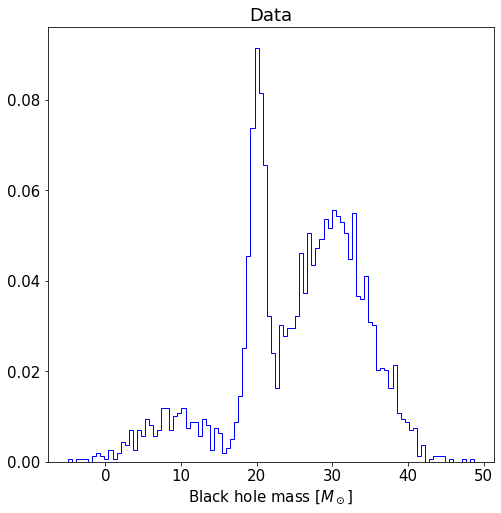

In [6]:
data = np.load("formationchannels.npy")
plt.hist(data, bins=100, density=True, histtype='step', color='b')
plt.xlabel("Black hole mass $[M_\odot]$")
plt.title('Data')
plt.show()

From this plot I can at least see two modes.

2) I completed the fit method for N = 1,...,10 Gaussians from sklearn.mixture.GaussianMixture. Then for each fit I computed the information criterion AIC and I plotted the data N vs AIC.

In [7]:
N = np.arange(1, 10)
models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i], n_init=30).fit(data)

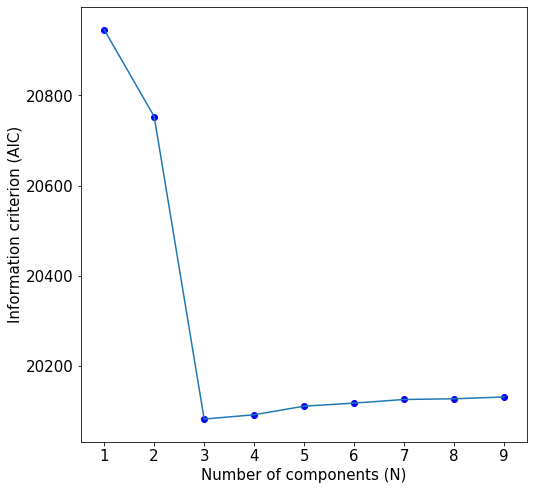

In [8]:
AIC = [model.aic(data) for model in models]
plt.plot(N, AIC)
plt.scatter(N, AIC, color='b')
plt.xlabel('Number of components (N)')
plt.ylabel('Information criterion (AIC)')
plt.show()

From the plot I can see that the best model is 3, then I check it 

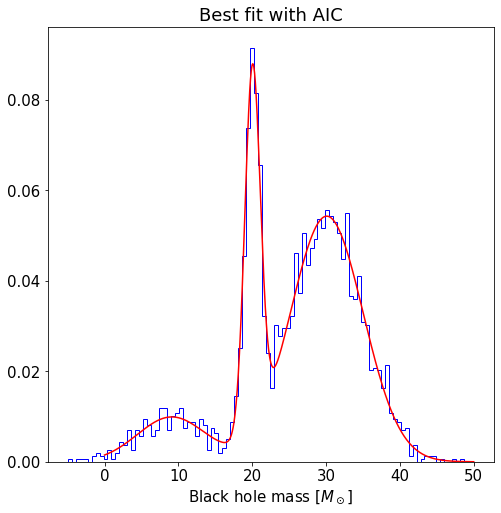

In [10]:
best = models[np.argmin(AIC)]

x = np.linspace(0, 50, 1000)

#logarithm of the likelihood for each sample
log_p = best.score_samples(x.reshape(-1, 1))
pdf = np.exp(log_p)

plt.hist(data, bins=100, density=True, histtype='step', color='b')
plt.plot(x, pdf, color='red')
plt.xlabel("Black hole mass $[M_\odot]$")
plt.title('Best fit with AIC')
plt.show()

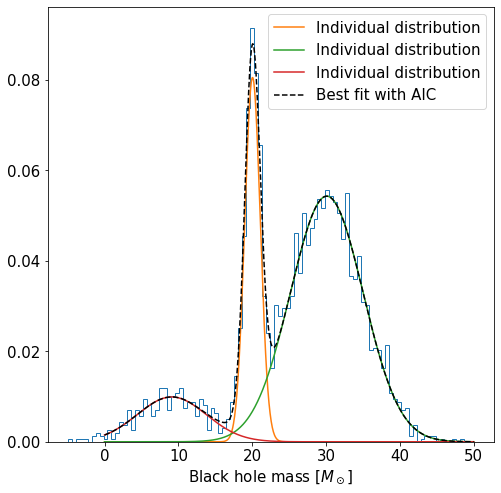

In [13]:
#density of each Gaussian component for each sample
density = best.predict_proba(x.reshape(-1,1))

#now I evaluate the sigle pdf for each component
pdf_indiv = density*pdf[:, np.newaxis] #np.newaxis perchè altrimenti ho shape differenti

plt.hist(data, bins=100, density=True, histtype='step')

#plot each individual pdf
for i in range(N[np.argmin(AIC)]):
    plt.plot(x, pdf_indiv[:,i], label='Individual distribution') 
    
plt.plot(x, pdf, '--k', label='Best fit with AIC')
plt.xlabel("Black hole mass $[M_\odot]$")
plt.legend()
plt.show()